In [1]:
import numpy as np
import matplotlib.pyplot as plt
N=28
pairs=[]
pairs=[[i,j] for i in range(N) for j in range(N) if i>j]
import matplotlib.pyplot as plt
file=['0','1','2','3','4','5','6']
MutInfoArr=np.zeros([len(pairs),7])
for k in range(len(file)):
    MutInfo=open("/home/nivedita/7thMay/Project-EntanglementRG/DataFiles/EntanglementCharacterization/MutualInformation/MutInf28#"+file[k]+".txt","+r")
    MutInfoArr[:,k]=np.array([float(elem) for elem in MutInfo.readlines()])
    MutInfo.close()

In [2]:
points0=[6,13,20,27]#RG fixed points
pairs0=[[point1,point2] for point1 in points0 for point2 in points0 if point1>point2]
points1=points0+[point-1 for point in points0]#reverse RG step-1
pairs1=[[point1,point2] for point1 in points1 for point2 in points1 if point1>point2]
points2=points1+[point-2 for point in points0]#reverse RG step-2
pairs2=[[point1,point2] for point1 in points2 for point2 in points2 if point1>point2]
points3=points2+[point-3 for point in points0]#reverse RG step-3
pairs3=[[point1,point2] for point1 in points3 for point2 in points3 if point1>point2]
points4=points3+[point-4 for point in points0]#reverse RG step-4
pairs4=[[point1,point2] for point1 in points4 for point2 in points4 if point1>point2]
points5=points4+[point-5 for point in points0]#reverse RG step-5
pairs5=[[point1,point2] for point1 in points5 for point2 in points5 if point1>point2]
points6=points5+[point-6 for point in points0]#reverse RG step-6
pairs6=[[point1,point2] for point1 in points6 for point2 in points6 if point1>point2]

In [3]:
classes=np.array(['Weak','Strong'])
classLabel=np.array([0,1])
def FeatureDiscretizer(feature,NumOfDisIntv):
    for i in range(NumOfDisIntv):
        if(feature>=i*(2*np.log(2))/NumOfDisIntv and feature<=(i+1)*(2*np.log(2))/NumOfDisIntv):
            return i
def Classifier(feature,NumOfDisIntv):
    FeatDiscrete=[0,NumOfDisIntv/2.,NumOfDisIntv]
    for i in range(len(FeatDiscrete)-1):
        if(feature>=FeatDiscrete[i] and feature<=FeatDiscrete[i+1]):
            return classLabel[i]

In [6]:
NumOfDisIntv=int(np.ceil(2*np.log(2)/np.min(MutInfoArr[:,6][MutInfoArr[:,6]>1e-3])))

In [7]:
mean,sigma=NumOfDisIntv/2.,NumOfDisIntv/5.
mutInfRand=[np.array(np.random.normal(mean,sigma, 28),dtype=int) for i in range(2000)]
Nrand=len(mutInfRand)
print(Nrand)

2000


In [8]:
yedges=np.array([0,0.5,1])
NumOfDisIntv=int(np.ceil(2*np.log(2)/np.min(MutInfoArr[:,6][MutInfoArr[:,6]>1e-3])))
#Making 10 bins
xedges=np.arange(1378)#[0,138,275,413,551,688,826,964,1102,1239,1377]#(1377/10.)*np.arange(11)#np.arange(1378)#
#2bins 1 for class=0 and class=1
yedges=np.array([0,0.5,1])

def CondProb(i,j,Step):
    print(i,j,Step)
    ordInd=[i,j] if i>j else [j,i]
    #NumOfDisIntv=int(np.ceil(2*np.log(2)/np.min(MutInfoArr[:,6][MutInfoArr[:,6]>1e-3])))
    pairsChosen=eval("pairs%s"%Step)
    #print(ordInd in pairsChosen)
    if ordInd in pairsChosen:
        MIArr = [MutInfoArr[:,Step][pairs.index(pair)] for pair in pairsChosen]
        MIArr0= [MutInfoArr[:,0][pairs.index(pair)] for pair in pairsChosen]
        pairFeat=np.array([FeatureDiscretizer(MI,NumOfDisIntv) for MI in MIArr])
        pairFeat0Step=np.array([FeatureDiscretizer(MI,NumOfDisIntv) for MI in MIArr0])
        pairClass0Step=np.array([Classifier(feat,NumOfDisIntv) for feat in pairFeat0Step])
        hist,bins1,bins2=np.histogram2d(pairFeat,pairClass0Step,bins=(xedges,yedges))
        featureFor_ij=pairFeat[pairsChosen.index(ordInd)]
        binFeat_ij=np.where(np.abs(bins1-featureFor_ij)==np.abs(bins1-featureFor_ij).min())[0][0]
        if binFeat_ij>len(hist)-1:
            binFeat_ij=binFeat_ij-1
        if(np.sum(hist[binFeat_ij])==0):
            condProb_ij_Strong=0
        else:
            condProb_ij_Strong = hist[binFeat_ij,1]/np.sum(hist[binFeat_ij])
        return condProb_ij_Strong     
    else:
        return 0
    

In [9]:
#print(CondProb(4,3,3))
#[print(CondProb(pair[0],pair[1],6)) for pair in pairs]
#CondProb(10,3,5)
#condProbArr=np.zeros([7,len(pairs)])
#for pair in pairs:
#    for i in range(7):
#        condProbArr[i][pairs==pair]=CondProb(pair[0],pair[1],i)
condProbArr=np.array([np.array([CondProb(pair[0],pair[1],i) for i in np.arange(7)]) for pair in pairs])
#CondProb(20,6,0) 

1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 0 5
1 0 6
2 0 0
2 0 1
2 0 2
2 0 3
2 0 4
2 0 5
2 0 6
2 1 0
2 1 1
2 1 2
2 1 3
2 1 4
2 1 5
2 1 6
3 0 0
3 0 1
3 0 2
3 0 3
3 0 4
3 0 5
3 0 6
3 1 0
3 1 1
3 1 2
3 1 3
3 1 4
3 1 5
3 1 6
3 2 0
3 2 1
3 2 2
3 2 3
3 2 4
3 2 5
3 2 6
4 0 0
4 0 1
4 0 2
4 0 3
4 0 4
4 0 5
4 0 6
4 1 0
4 1 1
4 1 2
4 1 3
4 1 4
4 1 5
4 1 6
4 2 0
4 2 1
4 2 2
4 2 3
4 2 4
4 2 5
4 2 6
4 3 0
4 3 1
4 3 2
4 3 3
4 3 4
4 3 5
4 3 6
5 0 0
5 0 1
5 0 2
5 0 3
5 0 4
5 0 5
5 0 6
5 1 0
5 1 1
5 1 2
5 1 3
5 1 4
5 1 5
5 1 6
5 2 0
5 2 1
5 2 2
5 2 3
5 2 4
5 2 5
5 2 6
5 3 0
5 3 1
5 3 2
5 3 3
5 3 4
5 3 5
5 3 6
5 4 0
5 4 1
5 4 2
5 4 3
5 4 4
5 4 5
5 4 6
6 0 0
6 0 1
6 0 2
6 0 3
6 0 4
6 0 5
6 0 6
6 1 0
6 1 1
6 1 2
6 1 3
6 1 4
6 1 5
6 1 6
6 2 0
6 2 1
6 2 2
6 2 3
6 2 4
6 2 5
6 2 6
6 3 0
6 3 1
6 3 2
6 3 3
6 3 4
6 3 5
6 3 6
6 4 0
6 4 1
6 4 2
6 4 3
6 4 4
6 4 5
6 4 6
6 5 0
6 5 1
6 5 2
6 5 3
6 5 4
6 5 5
6 5 6
7 0 0
7 0 1
7 0 2
7 0 3
7 0 4
7 0 5
7 0 6
7 1 0
7 1 1
7 1 2
7 1 3
7 1 4
7 1 5
7 1 6
7 2 0
7 2 1
7 2 2
7 2 3
7 2 4
7 2 

18 16 5
18 16 6
18 17 0
18 17 1
18 17 2
18 17 3
18 17 4
18 17 5
18 17 6
19 0 0
19 0 1
19 0 2
19 0 3
19 0 4
19 0 5
19 0 6
19 1 0
19 1 1
19 1 2
19 1 3
19 1 4
19 1 5
19 1 6
19 2 0
19 2 1
19 2 2
19 2 3
19 2 4
19 2 5
19 2 6
19 3 0
19 3 1
19 3 2
19 3 3
19 3 4
19 3 5
19 3 6
19 4 0
19 4 1
19 4 2
19 4 3
19 4 4
19 4 5
19 4 6
19 5 0
19 5 1
19 5 2
19 5 3
19 5 4
19 5 5
19 5 6
19 6 0
19 6 1
19 6 2
19 6 3
19 6 4
19 6 5
19 6 6
19 7 0
19 7 1
19 7 2
19 7 3
19 7 4
19 7 5
19 7 6
19 8 0
19 8 1
19 8 2
19 8 3
19 8 4
19 8 5
19 8 6
19 9 0
19 9 1
19 9 2
19 9 3
19 9 4
19 9 5
19 9 6
19 10 0
19 10 1
19 10 2
19 10 3
19 10 4
19 10 5
19 10 6
19 11 0
19 11 1
19 11 2
19 11 3
19 11 4
19 11 5
19 11 6
19 12 0
19 12 1
19 12 2
19 12 3
19 12 4
19 12 5
19 12 6
19 13 0
19 13 1
19 13 2
19 13 3
19 13 4
19 13 5
19 13 6
19 14 0
19 14 1
19 14 2
19 14 3
19 14 4
19 14 5
19 14 6
19 15 0
19 15 1
19 15 2
19 15 3
19 15 4
19 15 5
19 15 6
19 16 0
19 16 1
19 16 2
19 16 3
19 16 4
19 16 5
19 16 6
19 17 0
19 17 1
19 17 2
19 17 3
19 17 4
19 17 

26 0 0
26 0 1
26 0 2
26 0 3
26 0 4
26 0 5
26 0 6
26 1 0
26 1 1
26 1 2
26 1 3
26 1 4
26 1 5
26 1 6
26 2 0
26 2 1
26 2 2
26 2 3
26 2 4
26 2 5
26 2 6
26 3 0
26 3 1
26 3 2
26 3 3
26 3 4
26 3 5
26 3 6
26 4 0
26 4 1
26 4 2
26 4 3
26 4 4
26 4 5
26 4 6
26 5 0
26 5 1
26 5 2
26 5 3
26 5 4
26 5 5
26 5 6
26 6 0
26 6 1
26 6 2
26 6 3
26 6 4
26 6 5
26 6 6
26 7 0
26 7 1
26 7 2
26 7 3
26 7 4
26 7 5
26 7 6
26 8 0
26 8 1
26 8 2
26 8 3
26 8 4
26 8 5
26 8 6
26 9 0
26 9 1
26 9 2
26 9 3
26 9 4
26 9 5
26 9 6
26 10 0
26 10 1
26 10 2
26 10 3
26 10 4
26 10 5
26 10 6
26 11 0
26 11 1
26 11 2
26 11 3
26 11 4
26 11 5
26 11 6
26 12 0
26 12 1
26 12 2
26 12 3
26 12 4
26 12 5
26 12 6
26 13 0
26 13 1
26 13 2
26 13 3
26 13 4
26 13 5
26 13 6
26 14 0
26 14 1
26 14 2
26 14 3
26 14 4
26 14 5
26 14 6
26 15 0
26 15 1
26 15 2
26 15 3
26 15 4
26 15 5
26 15 6
26 16 0
26 16 1
26 16 2
26 16 3
26 16 4
26 16 5
26 16 6
26 17 0
26 17 1
26 17 2
26 17 3
26 17 4
26 17 5
26 17 6
26 18 0
26 18 1
26 18 2
26 18 3
26 18 4
26 18 5
26 18 6
26 19 

In [10]:
condProbRandStrong=np.zeros((2000,6))+0.0
for i in range(2000):
    for pair0 in pairs0:
        MIArr0= [MutInfoArr[:,0][pairs.index(pair)] for pair in pairs1]
        NumOfDisIntv=int(np.ceil(2*np.log(2)/np.min(MutInfoArr[:,6][MutInfoArr[:,6]>1e-3])))
        xedges=[0,138,275,413,551,688,826,964,1102,1239,1377]
        pairFeat0Step=np.array([FeatureDiscretizer(MI,NumOfDisIntv) for MI in MIArr0])
        pairClass0Step=np.array([Classifier(feat,NumOfDisIntv) for feat in pairFeat0Step])
        hist,bins1,bins2=np.histogram2d(mutInfRand[i],pairClass0Step,bins=(xedges,yedges))
        featureFor_ij=mutInfRand[i][pairs1.index(pair0)]
        binFeat_ij=np.where(np.abs(bins1-featureFor_ij)==np.abs(bins1-featureFor_ij).min())[0][0]
        if binFeat_ij>len(hist)-1:
            binFeat_ij=binFeat_ij-1
        #print(binFeat_ij)
        if np.sum(hist[binFeat_ij])==0:
            condProbRandStrong[i][pairs0==pair0]=0
        else:
            condProbRandStrong[i][pairs0.index(pair0)] = hist[binFeat_ij,1]/np.sum(hist[binFeat_ij])

In [11]:
pairsArr=np.asarray(pairs,dtype=object)
condProbArrSample=np.array([condProbArr[:,1][np.sum(pairsArr==pair,axis=1)==2][0] for pair in pairs0])
for i in range(2000):
    if (np.sum(condProbRandStrong[i])!=0):
        condProbRandStrong[i]=condProbRandStrong[i]/np.sum(condProbRandStrong[i])
DistanceBtwnDistrib=[np.abs(condProbArrSample/np.sum(condProbArrSample)-condProbRandStrong[i]).max() for i in range(2000)]

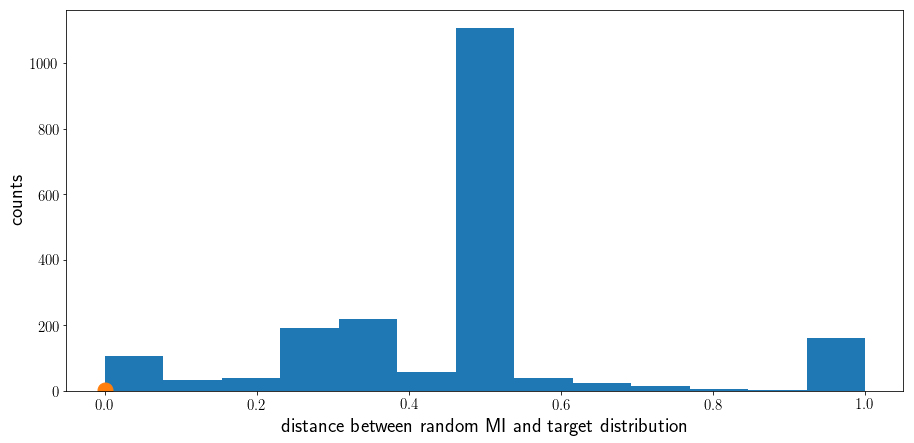

In [90]:
hist,bins=np.histogram(DistanceBtwnDistrib,bins=13)
plt.rcParams['figure.figsize'] = [15,7]
plt.hist(DistanceBtwnDistrib,bins)
plt.xlabel('distance between random MI and target distribution',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(0,1,marker='o',markersize=15)

In [13]:
P=hist[0]/np.sum(hist)

In [14]:
P

0.0525

In [15]:
xedges=np.arange(1378)#[0,138,275,413,551,688,826,964,1102,1239,1377]
yedges=np.array([0,0.5,1])
pairsChosen=pairs0
MutInfFeatClass=np.zeros(7)
MutInfInitLatFeat=np.zeros(7)
pairFeat=np.zeros([len(pairsChosen),7])
MIArr6=[MutInfoArr[:,6][pairs.index(pair)] for pair in pairs0]
MIArr=[MutInfoArr[:,0][pairs.index(pair)] for pair in pairs0]
pairFeat0=np.array([FeatureDiscretizer(MI,NumOfDisIntv) for MI in MIArr])
pairClass0=np.array([Classifier(feature,NumOfDisIntv) for feature in pairFeat0])
pairFeatInit=np.array([FeatureDiscretizer(MI,NumOfDisIntv) for MI in MIArr6])
def mutualInfoFeatClass(pairFeature,pairClass):
    hist,bins1,bins2=np.histogram2d(pairFeature,pairClass,bins=(xedges,yedges))
    p_AB=hist/np.sum(hist)
    p_A=np.sum(hist,axis=0)/np.sum(hist)
    p_B=np.sum(hist,axis=1)/np.sum(hist)
    S_A=-p_A*np.log(p_A)
    S_B=-p_B*np.log(p_B)
    S_AB=-p_AB*np.log(p_AB)
    S_A[p_A==0]=0.0
    S_B[p_B==0]=0.0
    S_AB[p_AB==0]=0.0
    MutInfAB=np.sum(S_A)+np.sum(S_B)-np.sum(S_AB)
    return MutInfAB#,p_A,p_B,p_AB
def mutualInfoFeatInitLat(pairFeature1,pairFeature2):
    hist,bins1,bins2=np.histogram2d(pairFeature1,pairFeature2,bins=(xedges,xedges))
    p_AB=hist/np.sum(hist)
    p_A=np.sum(hist,axis=0)/np.sum(hist)
    p_B=np.sum(hist,axis=1)/np.sum(hist)
    S_A=-p_A*np.log(p_A)
    S_B=-p_B*np.log(p_B)
    S_AB=-p_AB*np.log(p_AB)
    S_A[p_A==0]=0.0
    S_B[p_B==0]=0.0
    S_AB[p_AB==0]=0.0
    MutInfAB=np.sum(S_A)+np.sum(S_B)-np.sum(S_AB)
    return MutInfAB#,p_A,p_B,p_AB

In [16]:
for i in range(7):
    MIArr=[MutInfoArr[:,i][pairs.index(pair)] for pair in pairsChosen]
    pairFeat[:,i]=np.array([FeatureDiscretizer(MI,NumOfDisIntv) for MI in MIArr])
    pairClass0=np.array([Classifier(feature,NumOfDisIntv) for feature in pairFeat[:,0]])
    MutInfFeatClass[i]=mutualInfoFeatClass(pairFeat[:,i],pairClass0)
    MutInfInitLatFeat[i]=mutualInfoFeatInitLat(pairFeat[:,i],pairFeatInit)

/home/nivedita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/nivedita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply
/home/nivedita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/home/nivedita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply
/home/nivedita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/home/nivedita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
/home/nivedita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/home/nivedita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: Runtim

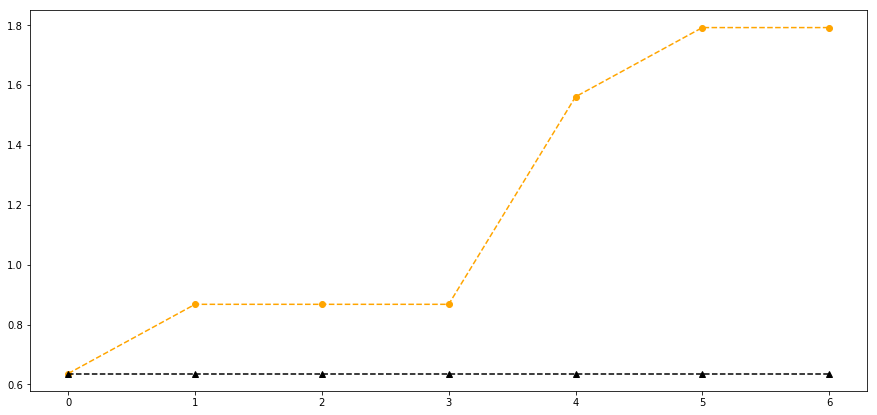

In [17]:
plt.plot(MutInfInitLatFeat,linestyle='--',marker='o',color='orange')
plt.plot(MutInfFeatClass,linestyle='--',marker='^',color='black')

In [44]:
pairClass0

array([0, 1, 0, 0, 1, 0])

Text(0, 0.5, 'class')

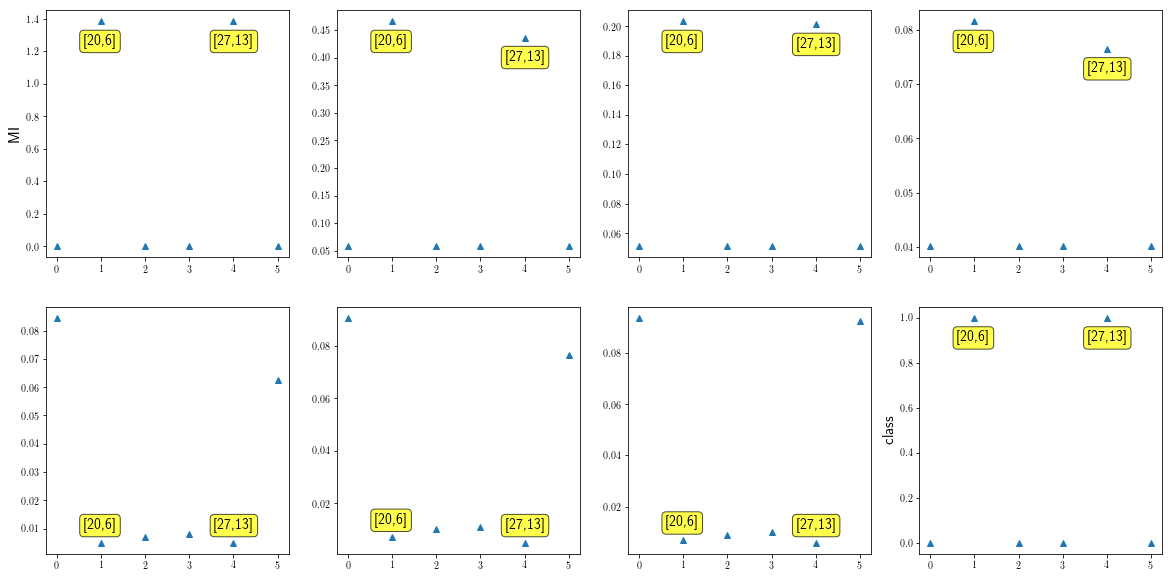

In [85]:
fig,ax=plt.subplots(2,4,figsize=(20, 10))
#plt.rcParams['figure.figsize'] = [25,15]
ax[0][0].plot(2*np.log(2)*(pairFeat[:,0]/NumOfDisIntv),marker='^',linestyle='')
ax[0][1].plot(2*np.log(2)*(pairFeat[:,1]/NumOfDisIntv),marker='^',linestyle='')
ax[0][2].plot(2*np.log(2)*(pairFeat[:,2]/NumOfDisIntv),marker='^',linestyle='')
ax[0][3].plot(2*np.log(2)*(pairFeat[:,3]/NumOfDisIntv),marker='^',linestyle='')
ax[1][0].plot(2*np.log(2)*(pairFeat[:,4]/NumOfDisIntv),marker='^',linestyle='')
ax[1][1].plot(2*np.log(2)*(pairFeat[:,5]/NumOfDisIntv),marker='^',linestyle='')
ax[1][2].plot(2*np.log(2)*(pairFeat[:,6]/NumOfDisIntv),marker='^',linestyle='')
ax[1][3].plot(pairClass0,marker='^',linestyle='')
ax[0][0].annotate( '[20,6]', xy=(1,2*np.log(2)*(pairFeat[:,0][1]/NumOfDisIntv)),xytext =(15,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[0][0].annotate( '[27,13]', xy=(4,2*np.log(2)*(pairFeat[:,0][4]/NumOfDisIntv)),xytext =(20,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[0][1].annotate( '[20,6]', xy=(1,2*np.log(2)*(pairFeat[:,1][1]/NumOfDisIntv)),xytext =(15,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[0][1].annotate( '[27,13]', xy=(4,2*np.log(2)*(pairFeat[:,1][4]/NumOfDisIntv)),xytext =(20,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14) 
ax[0][2].annotate( '[20,6]', xy=(1,2*np.log(2)*(pairFeat[:,2][1]/NumOfDisIntv)),xytext =(15,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[0][2].annotate( '[27,13]', xy=(4,2*np.log(2)*(pairFeat[:,2][4]/NumOfDisIntv)),xytext =(20,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[0][3].annotate( '[20,6]',xy=(1,2*np.log(2)*(pairFeat[:,3][1]/NumOfDisIntv)),xytext =(15,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[0][3].annotate( '[27,13]', xy=(4,2*np.log(2)*(pairFeat[:,3][4]/NumOfDisIntv)),xytext =(20,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[1][0].annotate( '[20,6]', xy=(1,2*np.log(2)*(pairFeat[:,4][1]/NumOfDisIntv)),xytext =(15,10),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[1][0].annotate( '[27,13]', xy=(4,2*np.log(2)*(pairFeat[:,4][4]/NumOfDisIntv)),xytext =(20,10),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[1][1].annotate( '[20,6]',xy=(1,2*np.log(2)*(pairFeat[:,5][1]/NumOfDisIntv)),xytext =(15,10),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[1][1].annotate( '[27,13]', xy=(4,2*np.log(2)*(pairFeat[:,5][4]/NumOfDisIntv)),xytext =(20,10),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[1][2].annotate( '[20,6]', xy=(1,2*np.log(2)*(pairFeat[:,6][1]/NumOfDisIntv)),xytext =(15,10),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[1][2].annotate( '[27,13]', xy=(4,2*np.log(2)*(pairFeat[:,6][4]/NumOfDisIntv)),xytext =(20,10),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[1][3].annotate( '[20,6]',xy=(1,pairClass0[1]),xytext =(15,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
ax[1][3].annotate( '[27,13]',xy=(4,pairClass0[4]),xytext =(20,-27),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.7),size=14)
#plt.legend(handlelength=5,fontsize=15)
ax[0][0].set_ylabel('MI',fontsize=15)
ax[1][3].set_ylabel('class',fontsize=15)

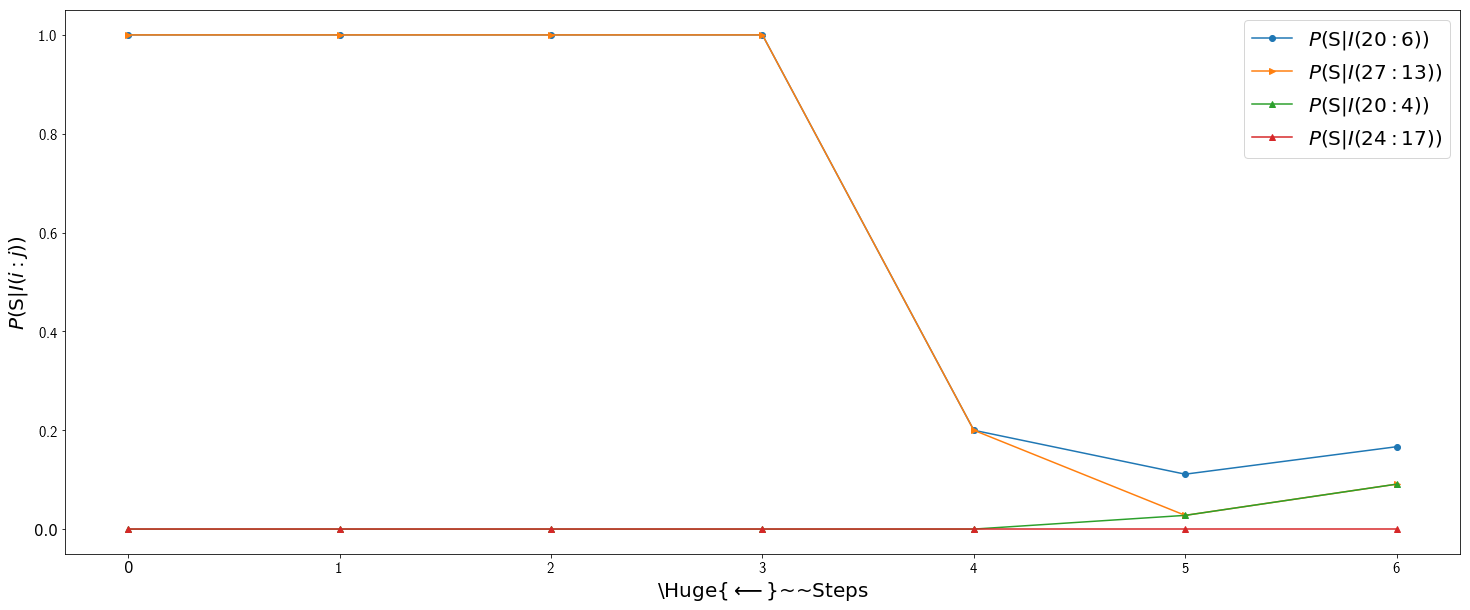

In [19]:
pairsArr=np.asarray(pairs,dtype=object)
figure,ax=plt.subplots(1,1)
ax.plot(condProbArr[np.sum(pairsArr==[20,6],axis=1)==2].T,marker='o',label=r'$P($S$|I(20:6))$')
ax.plot(condProbArr[np.sum(pairsArr==[27,13],axis=1)==2].T,marker='>',label=r'$P($S$|I(27:13))$')
ax.plot(condProbArr[np.sum(pairsArr==[20,4],axis=1)==2].T,marker='^',label=r'$P($S$|I(20:4))$')
ax.plot(condProbArr[np.sum(pairsArr==[24,17],axis=1)==2].T,marker='^',label=r'$P($S$|I(24:17))$')
ax.legend(handlelength=2,fontsize=20)
#ax[0].legend(handlelength=2,fontsize=20)
plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams['text.usetex'] = True
ax.set_xlabel(r'\Huge{$\longleftarrow$}~~Steps',fontsize=20)
ax.set_ylabel(r'$P($S$|I(i:j))$',fontsize=20)
ax.tick_params(labelsize=15)

In [20]:
plt.rcParams['figure.figsize'] = [7,7]
MI0Predict=np.array([np.array([2*np.log(2)*condProbArr[:,i][np.sum(pairsArr==pair,axis=1)==2][0] for pair in pairs0]) for i in range(7)])

(array([0., 2., 4.]), <a list of 3 Text yticklabel objects>)

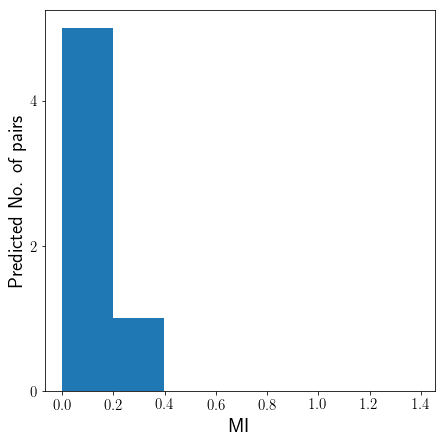

In [21]:
hist6,bins6=np.histogram(MI0Predict[6],bins=7,range=(0,2*np.log(2)),density=False) 
plt.hist(MI0Predict[6],bins6)
plt.rcParams['figure.figsize'] = [7,7]
plt.yticks(np.linspace(0,np.max(hist6),np.max(hist6)+1)[::2])
plt.rcParams['text.usetex'] = True
plt.xlabel('MI',fontsize=20)
plt.ylabel('Predicted No. of pairs',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0., 2., 4.]), <a list of 3 Text yticklabel objects>)

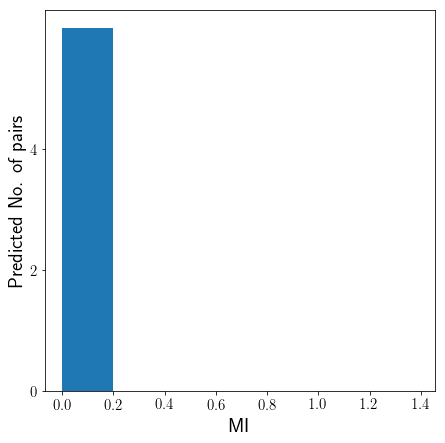

In [22]:
hist5,bins5=np.histogram(MI0Predict[5],bins=7,range=(0,2*np.log(2)),density=False) 
plt.hist(MI0Predict[5],bins5)
plt.rcParams['figure.figsize'] = [7,7]
plt.yticks(np.linspace(0,np.max(hist6),np.max(hist6)+1)[::2])
plt.rcParams['text.usetex'] = True
plt.xlabel('MI',fontsize=20)
plt.ylabel('Predicted No. of pairs',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0., 2., 4.]), <a list of 3 Text yticklabel objects>)

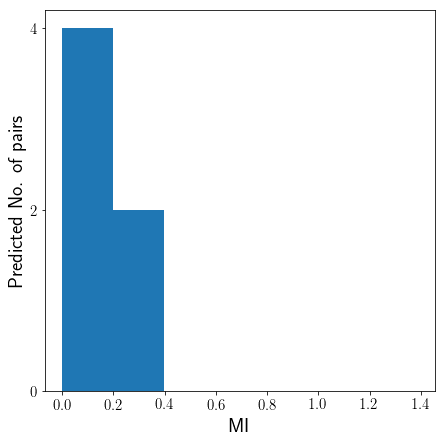

In [23]:
hist4,bins4=np.histogram(MI0Predict[4],bins=7,range=(0,2*np.log(2)),density=False) 
plt.hist(MI0Predict[4],bins4)

plt.rcParams['figure.figsize'] = [7,7]
plt.yticks(np.linspace(0,np.max(hist6),np.max(hist6)+1)[::2])
plt.rcParams['text.usetex'] = True
plt.xlabel('MI',fontsize=20)
plt.ylabel('Predicted No. of pairs',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0., 2., 4.]), <a list of 3 Text yticklabel objects>)

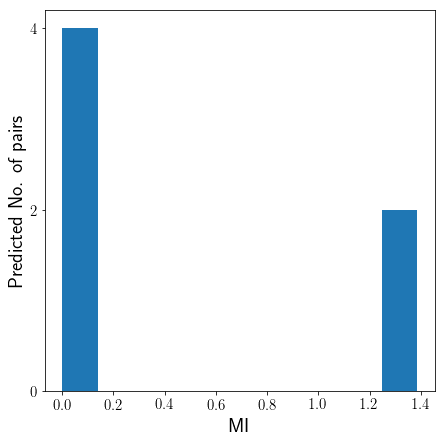

In [24]:
hist3,bins3=np.histogram(MI0Predict[3],bins=10,range=(0,2*np.log(2)),density=False) 
plt.hist(MI0Predict[3],bins3)
plt.rcParams['figure.figsize'] = [7,7]
plt.yticks(np.linspace(0,np.max(hist6),np.max(hist6)+1)[::2])
plt.rcParams['text.usetex'] = True
plt.xlabel('MI',fontsize=20)
plt.ylabel('Predicted No. of pairs',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0., 2., 4.]), <a list of 3 Text yticklabel objects>)

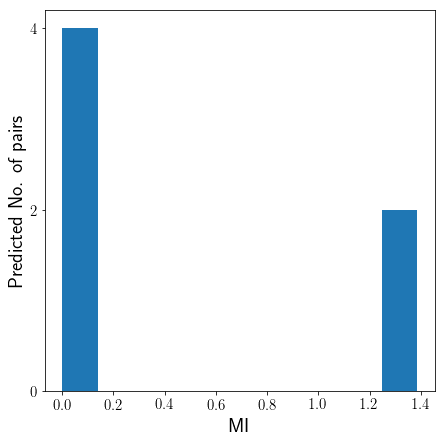

In [25]:
hist2,bins2=np.histogram(MI0Predict[2],bins=10,range=(0,2*np.log(2)),density=False) 
plt.hist(MI0Predict[2],bins2)
plt.rcParams['figure.figsize'] = [7,7]
plt.yticks(np.linspace(0,np.max(hist6),np.max(hist6)+1)[::2])
plt.rcParams['text.usetex'] = True
plt.xlabel('MI',fontsize=20)
plt.ylabel('Predicted No. of pairs',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

([<matplotlib.axis.YTick at 0x7f9e44a230f0>,
 <a list of 3 Text yticklabel objects>)

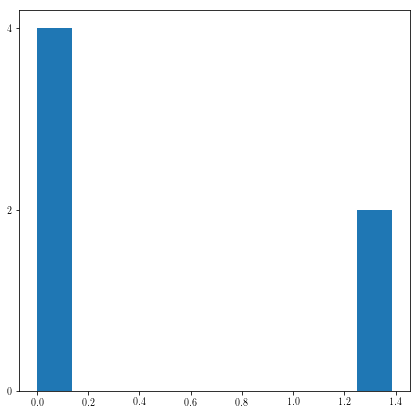

In [26]:
hist1,bins1=np.histogram(MI0Predict[1],bins=10,range=(0,2*np.log(2)),density=False) 
plt.hist(MI0Predict[1],bins1)
plt.yticks(np.linspace(0,np.max(hist1),np.max(hist1)+1)[::2])

([<matplotlib.axis.YTick at 0x7f9e44982e48>,
 <a list of 3 Text yticklabel objects>)

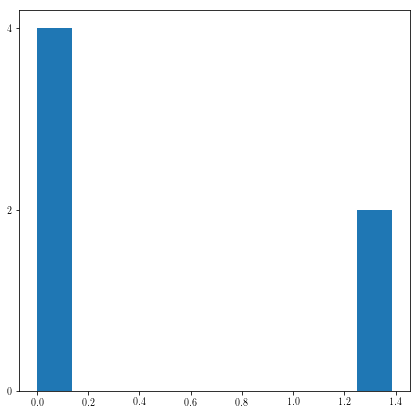

In [27]:
hist0,bins0=np.histogram(MI0Predict[0],bins=10,range=(0,2*np.log(2)),density=False) 
plt.hist(MI0Predict[0],bins0)
plt.yticks(np.linspace(0,np.max(hist0),np.max(hist0)+1)[::2])